In [1]:
import pandas as pd
import os

# solo
mtry_df = pd.read_csv('resources/results_solo_grid/mtry.csv')
num_trees_df = pd.read_csv('resources/results_solo_grid/num_trees.csv')
min_node_size_df = pd.read_csv('resources/results_solo_grid/min_node_size.csv')
replace_df = pd.read_csv('resources/results_solo_grid/replace.csv')
sample_fraction_df = pd.read_csv('resources/results_solo_grid/sample_fraction.csv')

# pairwise
directory = "resources/results_pairwise_random"
for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        filepath = os.path.join(directory, filename)
        # Remove the .csv from the filename to use as the variable name
        var_name = filename[:-4] + '_df'
        # Load the dataframe and assign it to a variable with the name in var_name
        df = pd.read_csv(filepath)
        # Drop the 'Unnamed: 0' column
        df = df.drop('Unnamed: 0', axis=1)
        globals()[var_name] = df

# all 5
results_all_bayesian_df = pd.read_csv('resources/results_all_search_algo/tuning_results.csv')
results_all_random_df = pd.read_csv('resources/results_all_random/results.csv')

# rename columns '_' --> '.' 
column_mapping = {col: col.replace('_', '.') for col in results_all_random_df.columns if col not in ['runtime_training', 'runtime_prediction']}
results_all_random_df.rename(columns=column_mapping, inplace=True)
results_all_random_df.columns

Index(['Unnamed: 0', 'num.trees', 'sample.fraction', 'mtry', 'replace',
       'min.node.size', 'mse', 'runtime_training', 'runtime_prediction'],
      dtype='object')

# Comparison of best hyperparameter combinations

In [2]:
mtry_df

,mtry,mse,runtime_training,runtime_prediction
0,1,1.671201e+09,0.116,0.034
1,2,9.457907e+08,0.168,0.034
2,3,8.176442e+08,0.262,0.042
3,4,7.357032e+08,0.282,0.038
4,5,7.205600e+08,0.302,0.038
5,6,7.032868e+08,0.306,0.046
6,7,6.799584e+08,0.338,0.044
7,8,6.968093e+08,0.368,0.044
8,9,7.062474e+08,0.416,0.042
9,10,6.698460e+08,0.414,0.044


In [3]:
# Solo values

pd.options.display.float_format = '{:.2f}'.format

print(mtry_df.loc[mtry_df['mse'].idxmin()])
print(num_trees_df.loc[num_trees_df['mse'].idxmin()])
print(min_node_size_df.loc[min_node_size_df['mse'].idxmin()])
print(replace_df.loc[replace_df['mse'].idxmin()])
print(sample_fraction_df.loc[sample_fraction_df['mse'].idxmin()])

mtry                        16.00
mse                  618131360.44
runtime_training             0.68
runtime_prediction           0.05
Name: 15, dtype: float64
num_trees                  148.00
mse                  654037329.28
runtime_training             0.12
runtime_prediction           0.03
Name: 147, dtype: float64
min.node.size                4.00
mse                  658493738.00
runtime_training             0.40
runtime_prediction           0.04
Name: 3, dtype: float64
replace                      True
mse                  666984929.06
runtime_training             0.36
runtime_prediction           0.04
Name: 0, dtype: object
sample.fraction              0.92
mse                  661497672.34
runtime_training             0.31
runtime_prediction           0.04
Name: 91, dtype: float64


# Default Values

mtry:  sqrt(p) , p = number of variables  
num.trees: 500  
min.node.size: 5  
sample.fraction: 1 für Bootstrap (mit Ersatz) / 0.632 Bootstrap ohne Ersatz  
replace: TRUE  

# Solo Results

mtry: 16  
num_trees: 148  
min.node.size: 4  
replace: TRUE  
sample.fraction: 0.92  



# mtry: 
- higher than the default value
# num.trees:
- lower than the default value
# min.node.size:
- just a little lower than the default value
# sample.fraction:
- relatively high
# replace:
- default

# Pairwise Tuning Results

In [36]:
dfs= [mtry_min_node_size_df, mtry_replace_df, mtry_sample_fraction_df, num_trees_min_node_size_df, num_trees_mtry_df, num_trees_replace_df, num_trees_sample_fraction_df, min_node_size_replace_df, sample_fraction_min_node_size_df, sample_fraction_replace_df]

combined_df = pd.concat(dfs, ignore_index=True)

hyperparameters = ['mtry', 'num_trees', 'min_node_size', 'replace', 'sample_fraction']

filtered_df = combined_df[hyperparameters]

correlation_matrix = filtered_df.corr()

# Ausgabe der Korrelationsmatrix
print(correlation_matrix)


                 mtry  num_trees  min_node_size  replace  sample_fraction
mtry             1.00      -0.03          -0.03     0.02             0.05
num_trees       -0.03       1.00           0.06    -0.07             0.03
min_node_size   -0.03       0.06           1.00    -0.02             0.02
replace          0.02      -0.07          -0.02     1.00            -0.09
sample_fraction  0.05       0.03           0.02    -0.09             1.00


In [37]:
combined_df

,num_trees,sample_fraction,mtry,replace,min_node_size,mse,runtime_training,runtime_prediction
0,NaN,NaN,30.00,NaN,2.00,11458121056.28,1.19,0.05
1,NaN,NaN,24.00,NaN,20.00,10990190164.37,0.47,0.04
2,NaN,NaN,47.00,NaN,18.00,11304874645.90,0.86,0.03
3,NaN,NaN,40.00,NaN,19.00,11503605332.12,0.74,0.03
4,NaN,NaN,7.00,NaN,44.00,10728613356.10,0.16,0.03
...,...,...,...,...,...,...,...,...
4995,NaN,0.46,NaN,1.00,NaN,10677960569.61,0.21,0.03
4996,NaN,0.24,NaN,0.00,NaN,10291311921.96,0.15,0.03
4997,NaN,0.83,NaN,1.00,NaN,10801815749.94,0.32,0.04
4998,NaN,0.31,NaN,0.00,NaN,10538418626.66,0.19,0.03


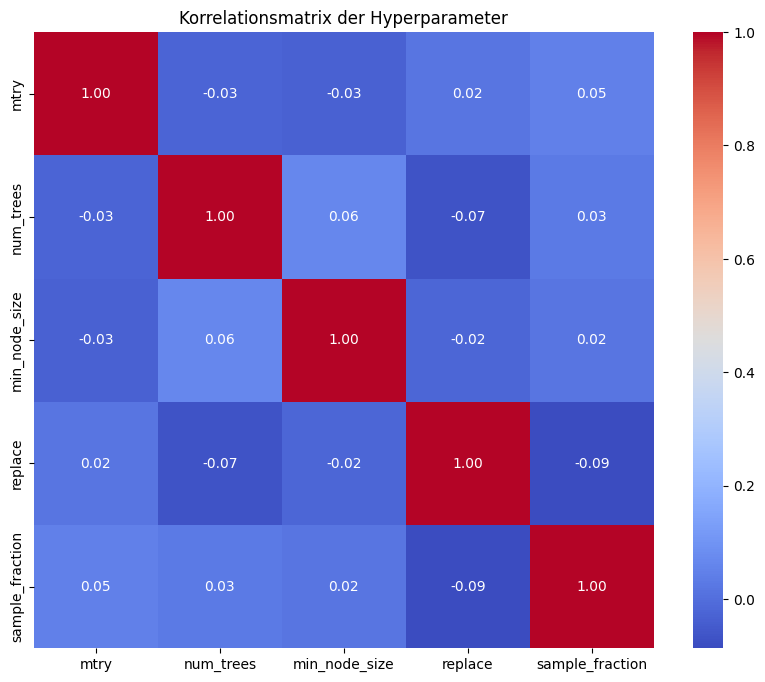

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Plotten der Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korrelationsmatrix der Hyperparameter')
plt.show()

In [39]:
import numpy as np

default_values = {
    'num_trees': 500,
    'sample_fraction': 1,
    'mtry': np.nan,
    'replace': True,
    'min_node_size': np.nan
}

# Fehlende Werte mit den Standardwerten füllen
for column, default_value in default_values.items():
    combined_df[column].fillna(default_value, inplace=True)

print(combined_df)

      num_trees  sample_fraction  mtry replace  min_node_size            mse   
0        500.00             1.00 30.00    True           2.00 11458121056.28  \
1        500.00             1.00 24.00    True          20.00 10990190164.37   
2        500.00             1.00 47.00    True          18.00 11304874645.90   
3        500.00             1.00 40.00    True          19.00 11503605332.12   
4        500.00             1.00  7.00    True          44.00 10728613356.10   
...         ...              ...   ...     ...            ...            ...   
4995     500.00             0.46   NaN    1.00            NaN 10677960569.61   
4996     500.00             0.24   NaN    0.00            NaN 10291311921.96   
4997     500.00             0.83   NaN    1.00            NaN 10801815749.94   
4998     500.00             0.31   NaN    0.00            NaN 10538418626.66   
4999     500.00             0.23   NaN    1.00            NaN 10270237065.08   

      runtime_training  runtime_predict

In [40]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Beispiel: Regressionsmodell mit Interaktionstermen
# Erstellen einer Formel mit Interaktionstermen
formula = 'mse ~ mtry * num_trees + mtry * min_node_size + mtry * replace + mtry * sample_fraction + \
                  num_trees * min_node_size + num_trees * replace + num_trees * sample_fraction + \
                  min_node_size * replace + min_node_size * sample_fraction + \
                  replace * sample_fraction'

# Fitten des Modells
model = ols(formula, data=combined_df).fit()

# Ausgabe der Modellzusammenfassung
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    mse   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                     134.1
Date:                Sun, 19 May 2024   Prob (F-statistic):           1.26e-63
Time:                        14:57:27   Log-Likelihood:                -10580.
No. Observations:                 500   AIC:                         2.117e+04
Df Residuals:                     496   BIC:                         2.118e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [ ]:
# Pairwise Values 

print(mtry_min_node_size_df.loc[mtry_df['mse'].idxmin()])
print(mtry_replace_df.loc[mtry_df['mse'].idxmin()])
print(mtry_sample_fraction_df.loc[mtry_df['mse'].idxmin()])
print(num_trees_min_node_size_df.loc[mtry_df['mse'].idxmin()])
print(num_trees_mtry_df.loc[mtry_df['mse'].idxmin()])
print(num_trees_replace_df.loc[mtry_df['mse'].idxmin()])
print(num_trees_sample_fraction_df.loc[mtry_df['mse'].idxmin()])
print(min_node_size_replace_df.loc[mtry_df['mse'].idxmin()])
print(sample_fraction_min_node_size_df.loc[mtry_df['mse'].idxmin()])
print(sample_fraction_replace_df.loc[mtry_df['mse'].idxmin()])

# Default Values

mtry:  sqrt(p) , p = number of variables  8?
num.trees: 500  
min.node.size: 5  
sample.fraction: 1 für Bootstrap (mit Ersatz) / 0.632 Bootstrap ohne Ersatz  
replace: TRUE 

# Pairwise Tuning Results

mtry - min.node.size: 4 - 9  
mtry lower than in solo tuning, meaning that min.node.size could be responsible 

mtry - replace: 35 - FALSE  
augenscheinlich führt die Optimierung von replace zu einer höheren mtry
mtry - sample.fraction: 59 - 0.69  
num.trees - min.node.size: 1562 - 18  
num.trees - mtry: 1712 - 50  
num.trees - replace: 10 - FALSE  
num.trees - sample.fraction: 1518 - 0.28  
min.node.size - replace: 22 - TRUE  
min.node.size - sample.fraction: 34 - 0.37  
replace - sample.fraction: FALSE - 0.5  

 


In [2]:
# Random Search All 5 Hyperparameters
print(results_all_random_df.loc[mtry_df['mse'].idxmin()])

Unnamed: 0                   elapsed15
num.trees                           70
sample.fraction               0.721388
mtry                                27
replace                          False
min.node.size                       16
mse                   732541818.246398
runtime_training                 0.072
runtime_prediction               0.022
Name: 15, dtype: object


# Random Search Results
num.trees: 70  
sample.fraction: 0.72  
mtry: 27  
replace: FALSE  
min.node.size: 16  
